In [30]:
from dask.distributed import Client, progress
import dask
import json
import os
import dask.bag as db
import dask.dataframe as dd
import json
import time
import random
from dask.distributed import as_completed

In [3]:
client = Client(n_workers=4)

In [4]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 13.93 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:51702,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 13.93 GiB
Comm: tcp://127.0.0.1:51722,Total threads: 2
Dashboard: http://127.0.0.1:51725/status,Memory: 3.48 GiB
Nanny: tcp://127.0.0.1:51705,


In [6]:
DATAPATH = 'data'

In [8]:
%%time
b = dask.datasets.make_people(npartitions=100, records_per_partition=10000)
b.map(json.dumps).to_textfiles(os.path.join(DATAPATH, '*.json'))

CPU times: total: 3 s
Wall time: 38.5 s


['D:/Projekty/BigDataAnalysis/lab_03/examples/data/00.json',
 'D:/Projekty/BigDataAnalysis/lab_03/examples/data/01.json',
 'D:/Projekty/BigDataAnalysis/lab_03/examples/data/02.json',
 'D:/Projekty/BigDataAnalysis/lab_03/examples/data/03.json',
 'D:/Projekty/BigDataAnalysis/lab_03/examples/data/04.json',
 'D:/Projekty/BigDataAnalysis/lab_03/examples/data/05.json',
 'D:/Projekty/BigDataAnalysis/lab_03/examples/data/06.json',
 'D:/Projekty/BigDataAnalysis/lab_03/examples/data/07.json',
 'D:/Projekty/BigDataAnalysis/lab_03/examples/data/08.json',
 'D:/Projekty/BigDataAnalysis/lab_03/examples/data/09.json',
 'D:/Projekty/BigDataAnalysis/lab_03/examples/data/10.json',
 'D:/Projekty/BigDataAnalysis/lab_03/examples/data/11.json',
 'D:/Projekty/BigDataAnalysis/lab_03/examples/data/12.json',
 'D:/Projekty/BigDataAnalysis/lab_03/examples/data/13.json',
 'D:/Projekty/BigDataAnalysis/lab_03/examples/data/14.json',
 'D:/Projekty/BigDataAnalysis/lab_03/examples/data/15.json',
 'D:/Projekty/BigDataAna

## Dask bags

In [12]:
b = db.read_text(os.path.join(DATAPATH, '*.json')).map(json.loads)
b

dask.bag<loads, npartitions=100>

In [14]:
count_adults = b.filter(lambda record: record['age'] >= 18).count().compute()
count_adults

851539

In [15]:
occupations_counts = b.map(lambda record: record['occupation']).frequencies(sort=True).compute()
occupations_counts

[('Hot Foil Printer', 953),
 ('Master Mariner', 949),
 ('Remedial Therapist', 948),
 ('Assessor', 945),
 ('Auxiliary Nurse', 945),
 ('Training Manager', 943),
 ('Au Pair', 939),
 ('Flying Instructor', 939),
 ('Security Officer', 939),
 ('Carpet Cleaner', 938),
 ('Bus Conductor', 937),
 ('HGV Driver', 933),
 ('Matron', 933),
 ('Minibus Driver', 932),
 ('Money Broker', 932),
 ('Town Clerk', 931),
 ('Landworker', 930),
 ('Heating Engineer', 928),
 ('Orchestral', 928),
 ('Optometrist', 927),
 ('Green Keeper', 927),
 ('Sportsperson', 927),
 ('Stock Controller', 926),
 ('Telegraphist', 925),
 ('Metal Worker', 925),
 ('Civil Servant', 924),
 ('Professional Racing', 923),
 ('Ground Worker', 923),
 ('Sheriff', 922),
 ('Interior Decorator', 921),
 ('Chaplain', 921),
 ('Miner', 921),
 ('Ticket Inspector', 920),
 ('Military Leader', 920),
 ('Floor Manager', 920),
 ('Labelling Operator', 920),
 ('Machine Tool', 918),
 ('Geophysicist', 918),
 ('Psychologist', 917),
 ('Driver', 917),
 ('Window Dresse

In [16]:
adults = b.filter(lambda record: record['age'] >= 18)
adults

dask.bag<filter-lambda, npartitions=100>

## Dask deleyed

In [17]:
def inc(x):
    return x + 1

def double(x):
    return x * 2

def add(x, y):
    return x + y

data = [1, 2, 3, 4, 5]

In [18]:
output = []
for x in data:
    a = dask.delayed(inc)(x)
    b = dask.delayed(double)(x)
    c = dask.delayed(add)(a, b)
    output.append(c)

total = dask.delayed(sum)(output)

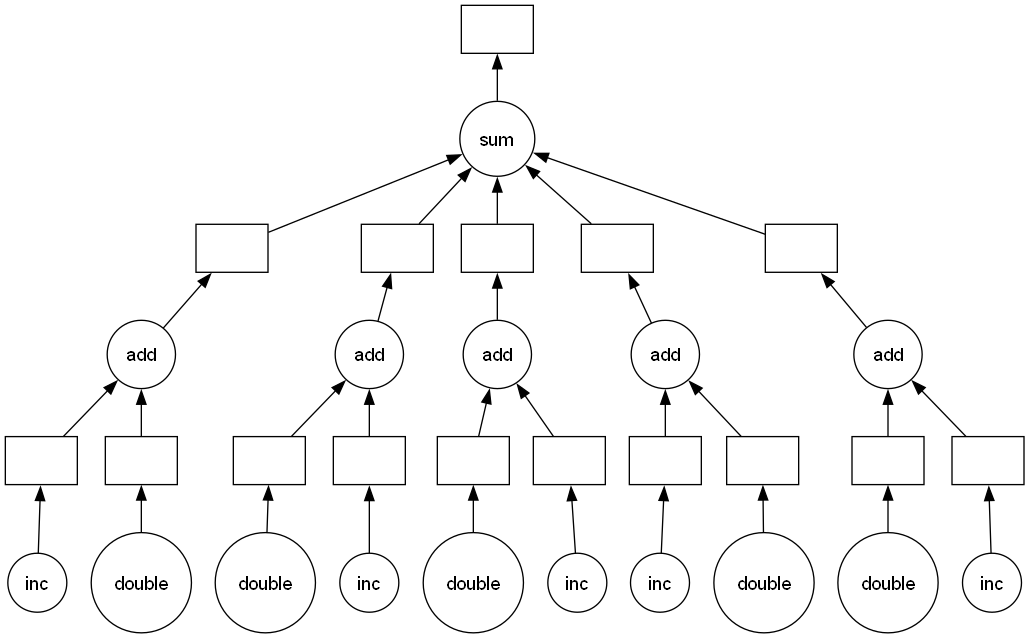

In [19]:
total.visualize()

## Dask features

In [21]:
def func(runs: int):
    sum = 0
    for run in range(runs):
        time.sleep(2)
        sum += run
    return sum

In [22]:
fut = client.submit(func, 20)

In [23]:
fut

<Future: pending, key: func-43c193e5a34fdc9e189ddedfcbfc285c>

In [24]:
a.result()

Delayed('result-6e809d92-8675-437a-b6e8-0691ba2e8145')

In [26]:
tasks = 100
futures = []

for task in range(tasks):
    futures.append(client.submit(func, random.randint(1, 15)))

In [27]:
results = client.gather(futures)
sum(results)

3367

In [34]:
task_list = [random.randint(1, 30) for _ in range(100)]
futures2 = client.map(func, task_list)

In [35]:
results2 = client.gather(futures2)
sum(results2)

13320

In [31]:
del futures2

In [32]:
display(len(set(task_list)))

29

In [40]:
for num, batch in enumerate(as_completed(futures2, with_results=True).batches(), start=1):
   display(f"Batch {num}")
   for batch in batch:
       display(f"Future {futures} result: {results}")

'Batch 1'

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Batch 2'

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

'Future [<Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-abb2103ea0c0ea3079b00851c9613e21>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-c77c5a410089f4baeb9ff9f5035f375c>, <Future: finished, type: int, key: func-f9514aa5621c40b442c587b1ea21971a>, <Future: finished, type: int, key: func-d0828d1606ed07e1e57627f378bc36f3>, <Future: finished, type: int, key: func-44fcf2a1591611c2fb9cb0cbe2749eab>, <Future: finished, type: int, key: func-81c79a480b7d12223b636350691fc8d9>, <Future: finished, type: int, key: func-620642abde7bf23746abdf2c97a4843e>, <Future: finished, type: int, key: func-8df9eb5c01af3ef724371afbdf333dae>, <Future: finished, type: int, key: func-a4bf39e5a2be552c1bbaa915df1f1d2d>, <Future: finishe

In [38]:
client.who_has(futures2)

Key,Copies,Workers
func-b983e2de98252753761d7718ae268b96,1,tcp://127.0.0.1:51724
func-eaf20001437966917fca73edd1e191d7,1,tcp://127.0.0.1:51721
func-8e2a002cc2d4b2a03a75c4ce92c13697,1,tcp://127.0.0.1:51723
func-041be567999555559b26d5c819d81c0f,1,tcp://127.0.0.1:51724
func-546928d5f712ebac77cca0fde586128b,1,tcp://127.0.0.1:51721
func-2db2d63a2068e58dddf291a719278932,1,tcp://127.0.0.1:51722
func-d996b5e4e76e0ec78790e270c033d0ff,1,tcp://127.0.0.1:51721
func-3bdd2e3537eee9cfb3d132240040d80c,1,tcp://127.0.0.1:51722
func-015d3723530050d16198b89247b5f14f,1,tcp://127.0.0.1:51722
func-953f02de0c28edbbe5bf5e512450b276,1,tcp://127.0.0.1:51722
